<a href="https://colab.research.google.com/github/shindechi/Yulu-Bikes-Case-Study/blob/main/Yulu_Casestudy_by_Prachi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case Study Walmart**

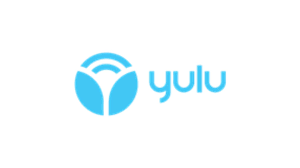

**Note: I have addressed only questions mentioned in the pdf named Yulu Data Exploration Business Case solution Approach**

https://colab.research.google.com/drive/19diU_81UWqS9xztcdOSZ3AvoTRJBmE8u?usp=sharing

**Some plots might not get completely printed on the pdf hence providing google colab link.**

----



#Business Problem

● Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to revolutionize daily commutes by offering unique, sustainable transportation solutions.

● However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting company to delve into the factors inﬂuencing the demand for their shared electric cycles, speciﬁcally in the Indian market.

**The data includes the following variables:**

1. **datetime:** datetime
2. **season:** season (1: spring, 2: summer, 3: fall, 4: winter)
3. **holiday :** whether day is a holiday or not
4. **workingday :** if day is neither weekend nor holiday is 1, otherwise is 0.
5. **weather:**
   o 1: Clear, Few clouds, partly cloudy
   o 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   o 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   o 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
6. **temp:** temperature in Celsius
7. **atemp:** feeling temperature in Celsius
8. **humidity:** humidity
9. **windspeed:** wind speed
10. **casual:** count of casual users
11. **registered:** count of registered users
12. **count:** count of total rental bikes including both casual and registered
___________________________________________________________________________

# **1. Deﬁne the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.**


a. Examine dataset structure, characteristics, and statistical summary.

b. Identify missing values and perform Imputation using an appropriate method.

c. Identify and remove duplicate records.

d. Analyze the distribution of Numerical & Categorical variables, separately

e. Check for Outliers and deal with them accordingly.


In [ ]:
# Importing necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loading the Yulu data

!gdown https://drive.google.com/file/d/1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i/view?usp=sharing

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i/view?usp=sharing
To: /content/view?usp=sharing
87.6kB [00:00, 43.7MB/s]


In [ ]:
# Assuming 'data' is your DataFrame

df = pd.read_csv("bike_sharing.csv")

#Overview of head and tail combined of the yulu dataframe

df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
# Get a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


 *Insights*

---

The Yulu dataset comprises 12 columns, with 1 column being categorical and 11 columns being numerical. While no columns showing null values.

In [ ]:
#Check the null values

print('\nColumns with missing value:')
print(df.isnull().any())


Columns with missing value:
datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool


 *Insights*

---

No columns showing null values.

In [ ]:
# Display the first few rows of the DataFrame

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Number of columns

df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
# Check the shape of the DataFrame

df.shape

(10886, 12)

In [ ]:
#Check the dimensions of the DataFrame

df.ndim

2

 **Insights*

---

The Yulu dataset is 2 dimensional with 10886 enteries and 12 descriptions.

Converting numerical datatype to categorical datatype, i.e changing the datatype of Occupation, Marital Status and Product Category.

In [ ]:
#Changing datatype int64 to object
cols=['season', 'holiday', 'workingday', 'weather']
df[cols]=df[cols].astype("object")
df.dtypes

df['datetime']=pd.to_datetime(df['datetime'])
df.dtypes

datetime      datetime64[ns]
season                object
holiday               object
workingday            object
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

*This data seems to have no null values.



In [ ]:
#Check duplicated rows
df.duplicated().sum()

0

In [ ]:
# Summary statistics for numerical columns

df.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


**Insights*

---

1)Minimum temperature in the sample data is 0.82 deg C where as Maximum temp is 41 deg C.

2) There are days when the number of casual users are 0 and number of registered users also O.

3)However, there is atleast 1 user in total count of users.

4) Maximum number of casual, registered and count are 367, 886 and 977 respectively.


#Non graphical analysis
Value counts and unique attributes

In [ ]:
# Uniques values of each columns

df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
# Creating new columns from datetime and converting them to categories

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [ ]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1


In [ ]:
# replacing the number with category

# change of season
df['season'] = df['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

# change of holiday
df['holiday'] = df['holiday'].replace({0:'No',1:'Yes'})

# change of workingday
df['workingday'] = df['workingday'].replace({0:'No',1:'Yes'})

# change of month
df['month'] = df['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})

In [ ]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477
registered,10886.0,155.552177,0.0,36.0,118.0,222.0,886.0,151.039033
count,10886.0,191.574132,1.0,42.0,145.0,284.0,977.0,181.144454
year,10886.0,2011.501929,2011.0,2011.0,2012.0,2012.0,2012.0,0.500019
day,10886.0,9.992559,1.0,5.0,10.0,15.0,19.0,5.476608


In [ ]:
# converting the categorical columns into category

cat_col = ['season', 'holiday', 'workingday', 'weather']

for _ in cat_col:
 df[_] = df[_].astype('category')

In [ ]:
df.describe(include = 'category').transpose()

,count,unique,top,freq
season,10886,4,Winter,2734
holiday,10886,2,No,10575
workingday,10886,2,Yes,7412
weather,10886,4,1,7192


**Insights*

---

1)The dataset encompasses both datetime information and various numerical features associated with bike rentals. The observations span from January 1, 2011, to December 19, 2012.


2)Numerical features such as temperature, humidity, windspeed, and counts of casual and registered bike rentals show diverse ranges and distributions, highlighting the variability in rental patterns across different conditions.


3)Observations on the year, day, and hour variables indicate temporal patterns, with a concentration in 2011 and 2012, a mean day value around 10, and an hourly distribution ranging from 0 to 23.



In [ ]:
#names of columns
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [ ]:
# Checking the uniques values of the column and its unique counts

for i in df.columns:
  print("*The unique values in",i, "column are :")
  print(df[i].unique())
  print(f"*Count of unique values : \n {df[i].nunique()}")
  print("-"*70)

*The unique values in datetime column are :
<DatetimeArray>
['2011-01-01 00:00:00', '2011-01-01 01:00:00', '2011-01-01 02:00:00',
 '2011-01-01 03:00:00', '2011-01-01 04:00:00', '2011-01-01 05:00:00',
 '2011-01-01 06:00:00', '2011-01-01 07:00:00', '2011-01-01 08:00:00',
 '2011-01-01 09:00:00',
 ...
 '2012-12-19 14:00:00', '2012-12-19 15:00:00', '2012-12-19 16:00:00',
 '2012-12-19 17:00:00', '2012-12-19 18:00:00', '2012-12-19 19:00:00',
 '2012-12-19 20:00:00', '2012-12-19 21:00:00', '2012-12-19 22:00:00',
 '2012-12-19 23:00:00']
Length: 10886, dtype: datetime64[ns]
*Count of unique values : 
 10886
----------------------------------------------------------------------
*The unique values in season column are :
['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']
*Count of unique values : 
 4
----------------------------------------------------------------------
*The unique values in holiday column are :
['No', 'Yes']
Categories (2, object):

In [ ]:
# Checking the value counts of the column.

for i in df.columns:
  print("*The value counts in",i, "column are :")
  print(df[i].value_counts())
  print("-"*70)

*The value counts in datetime column are :
datetime
2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: count, Length: 10886, dtype: int64
----------------------------------------------------------------------
*The value counts in season column are :
season
Winter    2734
Fall      2733
Summer    2733
Spring    2686
Name: count, dtype: int64
----------------------------------------------------------------------
*The value counts in holiday column are :
holiday
No     10575
Yes      311
Name: count, dtype: int64
----------------------------------------------------------------------
*The value counts in workingday column are :
workingday
Yes    7412
No     3474
Name: count, dtype: int64
----------------------------------------------------------------------
*The v

#Graphical analysis

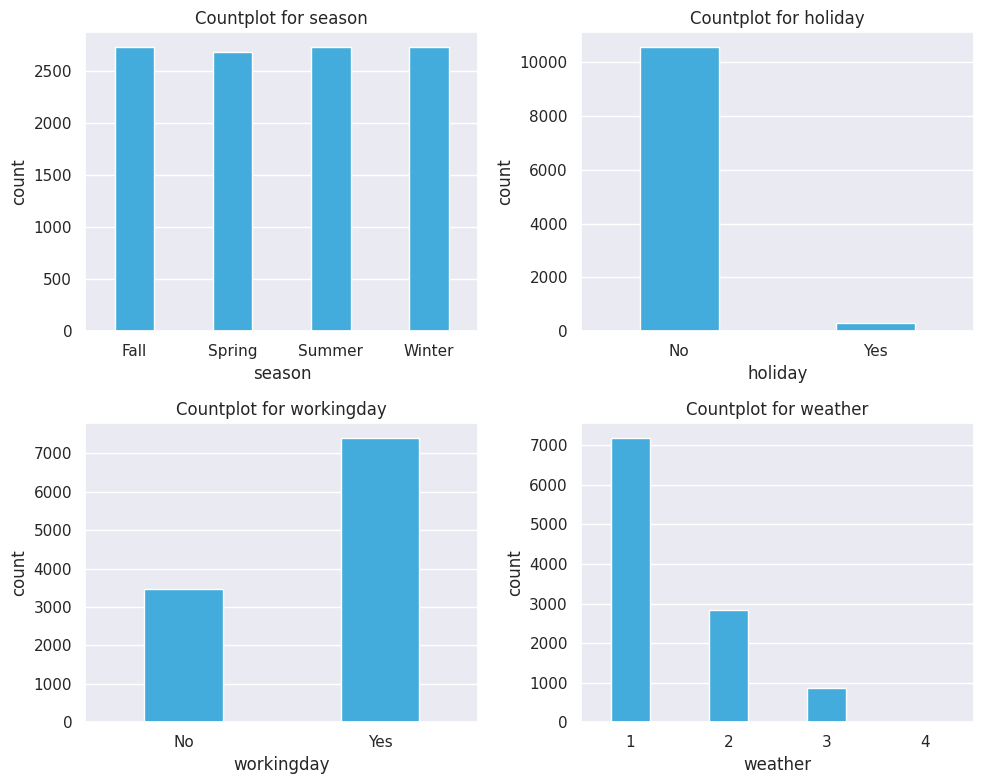

In [ ]:
# countplot on categories

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i, column in enumerate(cat_col, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, data=df, color="#29B6F6", width=0.4)
    plt.title(f'Countplot for {column}')

plt.tight_layout()
plt.show()

In [ ]:
# Function for histogram & boxplot on numerical columns

def hist_box(column):
    f, axs = plt.subplots(1, 2, figsize=(10, 5))
    sns.set(style="darkgrid")

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[column], color="#29B6F6")
    plt.title(f'Boxplot for {column}')

    tabular_data = df[column].describe().reset_index()
    tabular_data.columns = ['Statistic', 'Value']
    display(tabular_data)

    plt.tight_layout()
    plt.show()

,Statistic,Value
0,count,10886.00000
1,mean,20.23086
2,std,7.79159
3,min,0.82000
4,25%,13.94000
5,50%,20.50000
6,75%,26.24000
7,max,41.00000


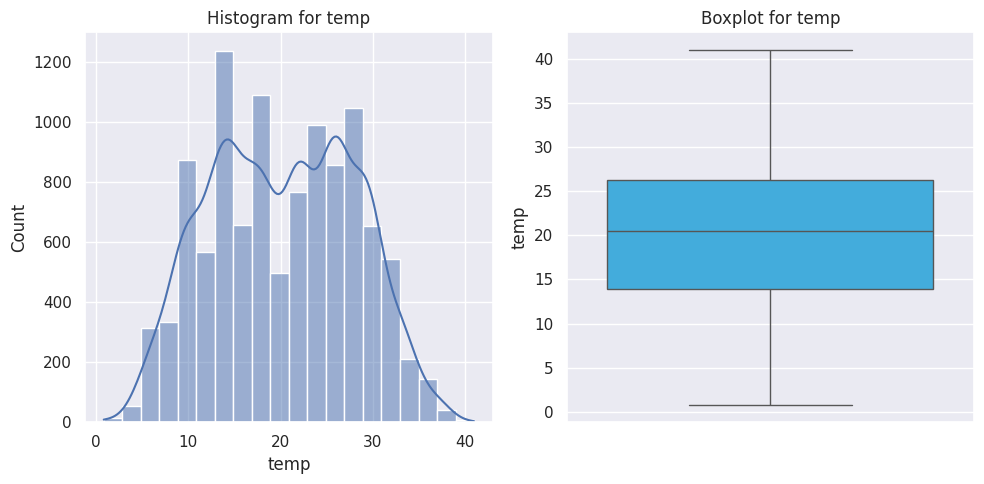

,Statistic,Value
0,count,10886.000000
1,mean,23.655084
2,std,8.474601
3,min,0.760000
4,25%,16.665000
5,50%,24.240000
6,75%,31.060000
7,max,45.455000


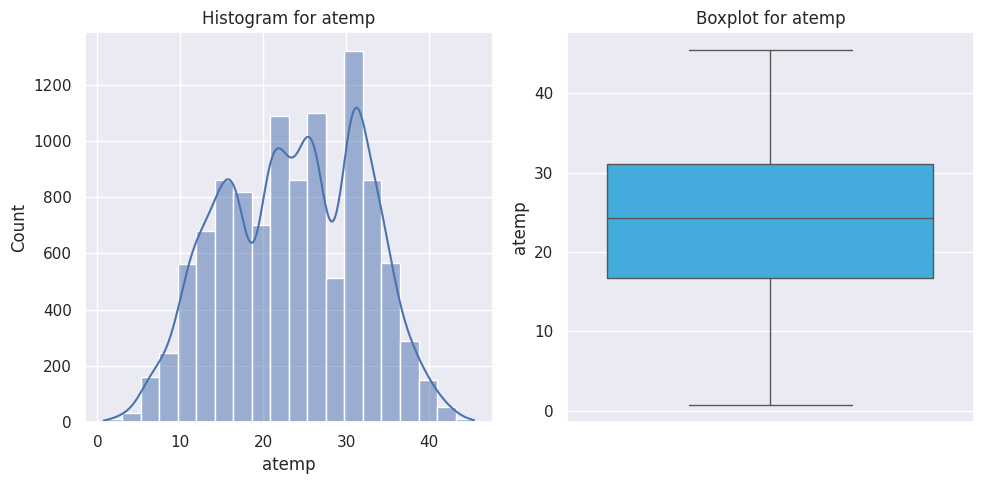

,Statistic,Value
0,count,10886.000000
1,mean,61.886460
2,std,19.245033
3,min,0.000000
4,25%,47.000000
5,50%,62.000000
6,75%,77.000000
7,max,100.000000


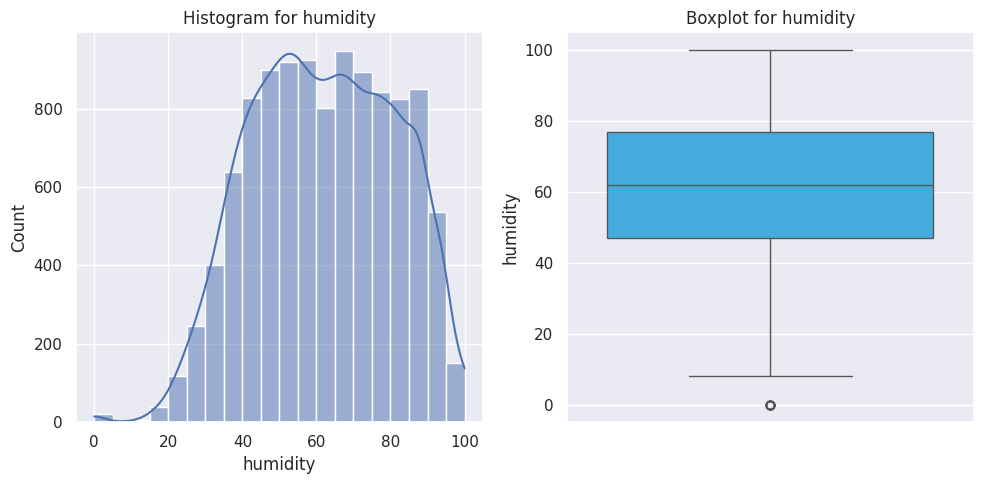

,Statistic,Value
0,count,10886.000000
1,mean,12.799395
2,std,8.164537
3,min,0.000000
4,25%,7.001500
5,50%,12.998000
6,75%,16.997900
7,max,56.996900


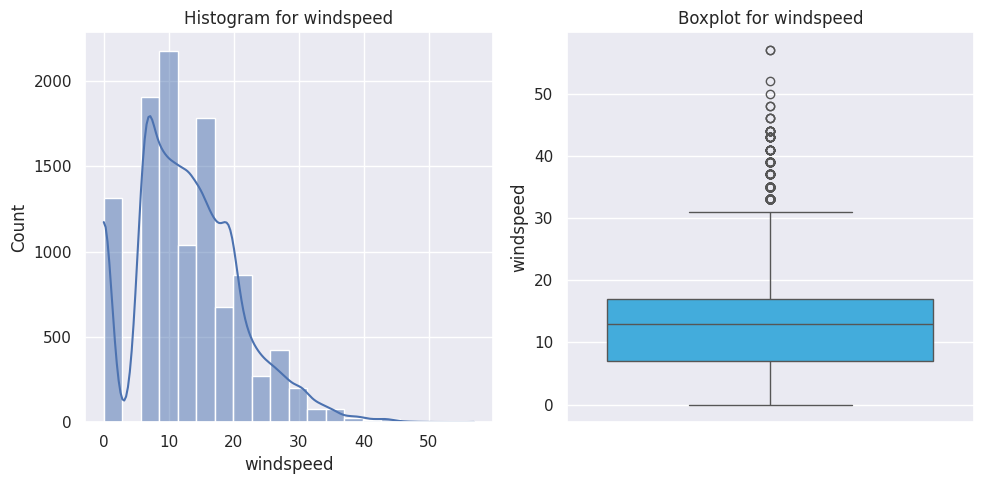

,Statistic,Value
0,count,10886.000000
1,mean,36.021955
2,std,49.960477
3,min,0.000000
4,25%,4.000000
5,50%,17.000000
6,75%,49.000000
7,max,367.000000


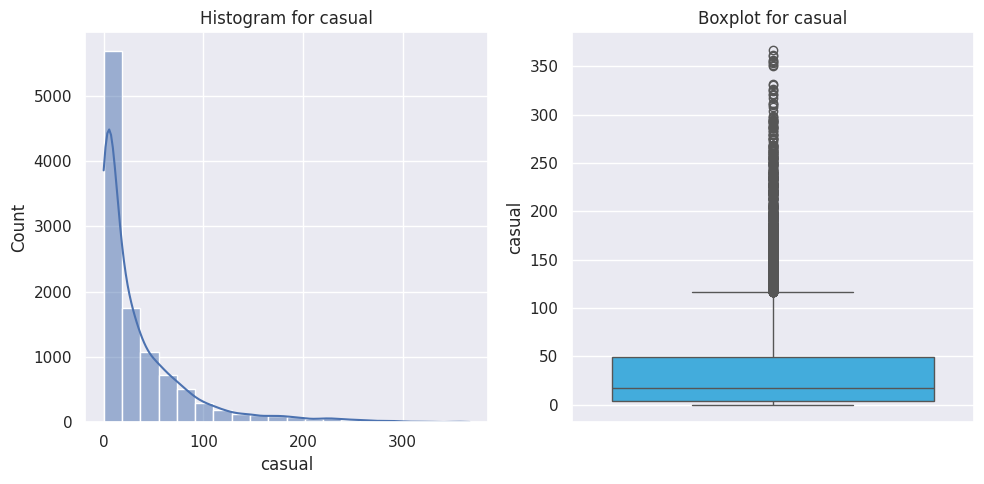

,Statistic,Value
0,count,10886.000000
1,mean,155.552177
2,std,151.039033
3,min,0.000000
4,25%,36.000000
5,50%,118.000000
6,75%,222.000000
7,max,886.000000


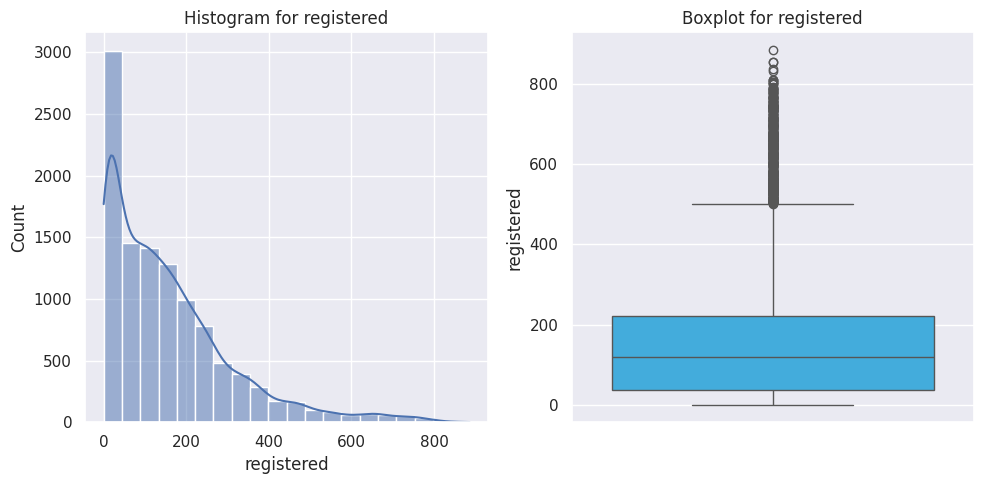

,Statistic,Value
0,count,10886.000000
1,mean,191.574132
2,std,181.144454
3,min,1.000000
4,25%,42.000000
5,50%,145.000000
6,75%,284.000000
7,max,977.000000


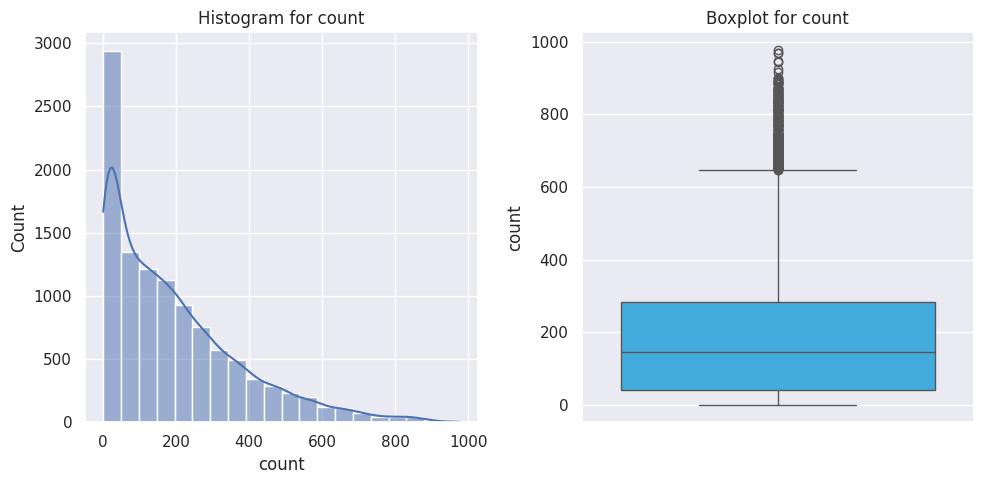

In [ ]:
num_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

for column in num_col:
    hist_box(column)

# **Outlier Detection**


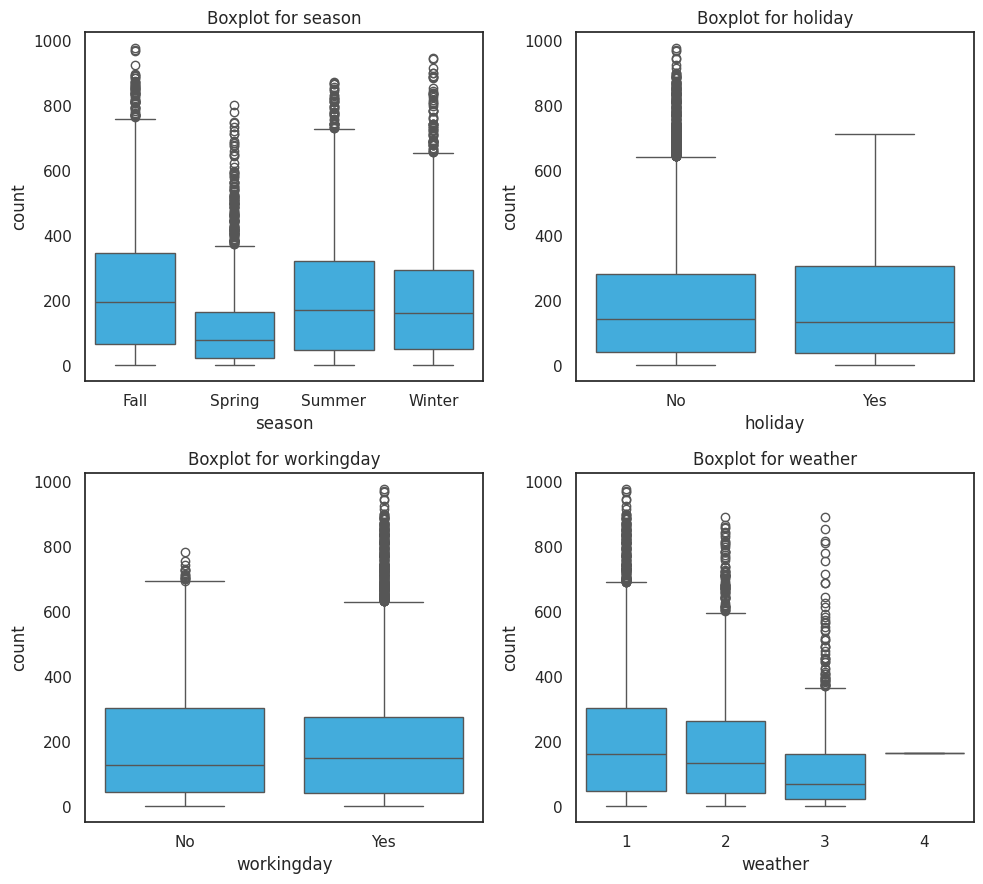

In [ ]:
plt.figure(figsize=(10, 9))
sns.set(style="white")

for i, column in enumerate(cat_col,1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=column, y='count', data=df, color="#29B6F6")
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

**Insights*

---

1)Outliers in Different Seasons: In spring and winter, there are more unusual values in the data compared to other seasons.

2)Weather Outliers: Category 3 weather has a lot of unusual values, while category 4 weather doesn't have any.

3)Working Days vs. Holidays: On regular working days, there are more unusual values in the data than on holidays. This suggests some unexpected patterns during typical workdays that might need a closer look.





In [ ]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
num_col = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Calculate percentiles for numerical columns only
percentiles = df[num_col].quantile([0.05, 0.95])

# Clip numerical columns to remove outliers
for col in num_col:
    lower_bound = percentiles.loc[0.05, col]
    upper_bound = percentiles.loc[0.95, col]
    df[col] = np.clip(df[col], lower_bound, upper_bound)


In [ ]:
num_col
percentiles

,temp,atemp,humidity,windspeed,casual,registered,count
0.05,8.2,9.850,31.0,0.0000,0.0,4.0,5.00
0.95,32.8,36.365,93.0,27.9993,141.0,464.0,563.75


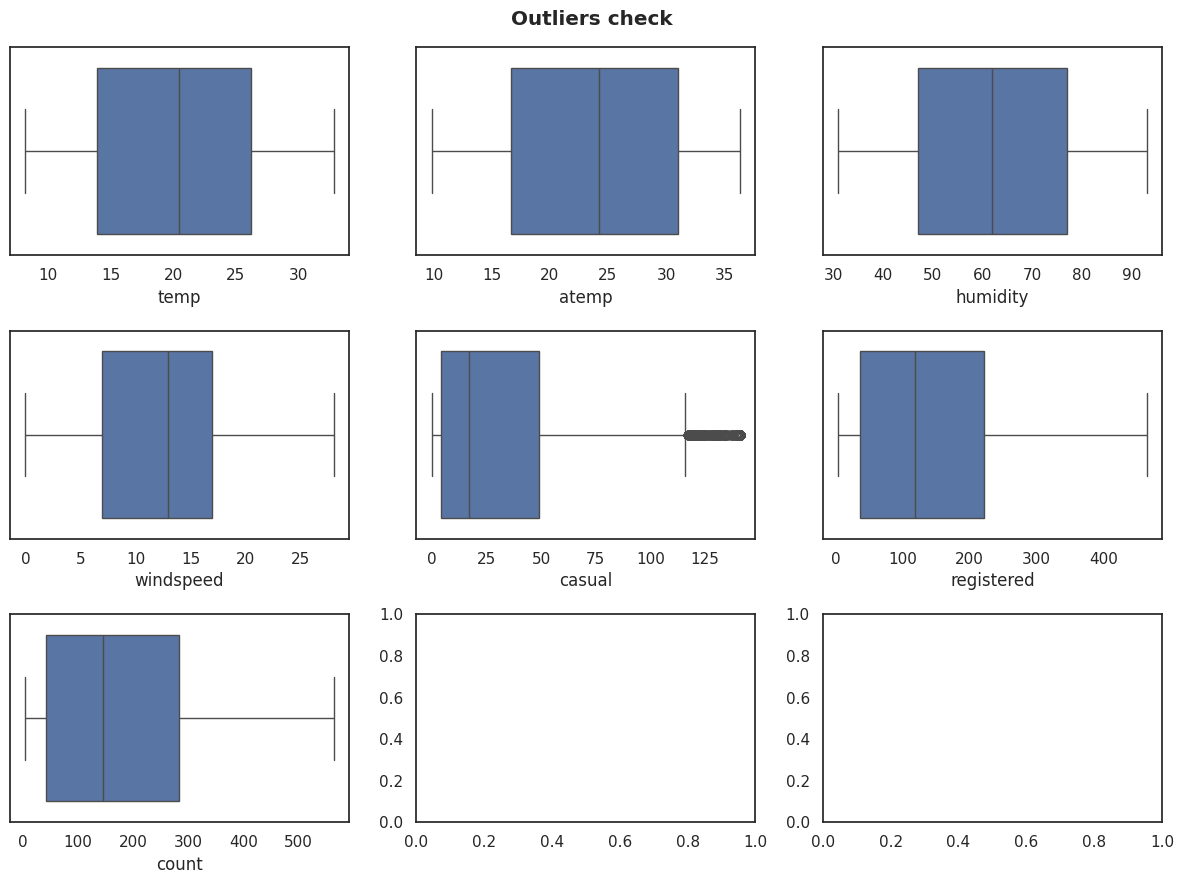

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))  # Adjust figsize for better visibility
fig.suptitle("Outliers check", weight='bold')

# Iterate over numerical columns and create boxplots
for i, col in enumerate(num_col):
    row = i // 3
    col_num = i % 3
    sns.boxplot(data=df, x=col, orient='h', ax=axes[row, col_num])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

**Insights*

---
1) Casual column has outliers still left.

**2)Temp:**
The 'temp' column shows a diverse temperature range (0.82 to 41.0), with a median of 20.5 and moderate variability around the mean of approximately 20.23 degrees Celsius.

**3)Atemp**
The 'atemp' column displays a wide range of apparent temperatures (0.76 to 45.455), with a mean of approximately 23.66 and moderate variability around the median of 24.24.

**4)Humidity**
The 'humidity' column depicts a range of humidity values (0 to 100), with an average around 61.89. The distribution shows moderate variability, from 47 at the 25th percentile to 77 at the 75th percentile, indicating diverse humidity levels in the dataset.

**5)WindSpeed**
The 'windspeed' column displays a range of wind speeds from 0 to 56.9979, with a mean of approximately 12.80.

**6)Casual**
The 'casual' column demonstrates a broad range of casual bike rental counts, with values spanning from 0 to 367. The distribution is positively skewed, as indicated by the mean (36.02) being less than the median (17.0).

**7)Registered**
The 'registered' column showcases a diverse range of registered bike rental counts, ranging from 0 to 886. The distribution is positively skewed, evidenced by the mean (155.55) being less than the median (118.0).

**8)Count**
The 'count' column reveals a wide range of total bike rental counts, varying from 1 to 977. The distribution is positively skewed, with a mean (191.57) greater than the median (145.0), indicating a concentration of lower values

# **2. Try establishing a Relationship between the Dependent and Independent Variables.**


i. Plot a Correlation Heatmap and draw insights.

ii. Remove the highly correlated variables, if any.

In [ ]:
cat_col

['season', 'holiday', 'workingday', 'weather']

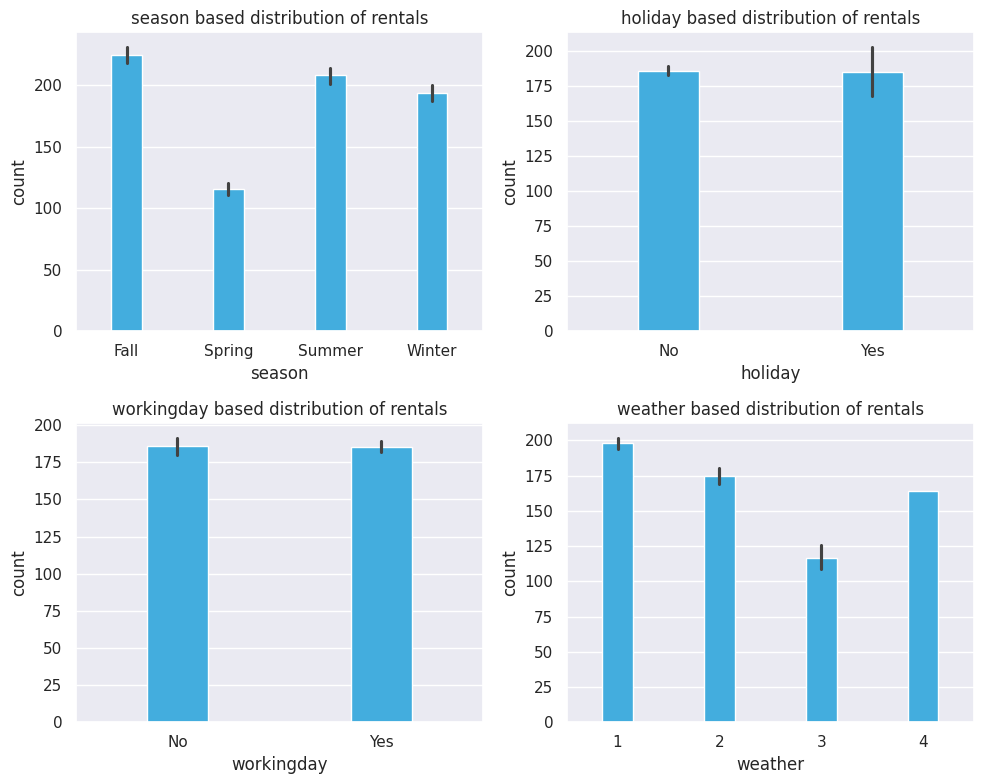

In [ ]:
# barplot of categories

plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")

for i, column in enumerate(cat_col,1):
    plt.subplot(2, 2, i)
    sns.barplot(x=column, y='count', data=df, color="#29B6F8", width = 0.3)
    plt.title(f'{column} based distribution of rentals')

plt.tight_layout()
plt.show()

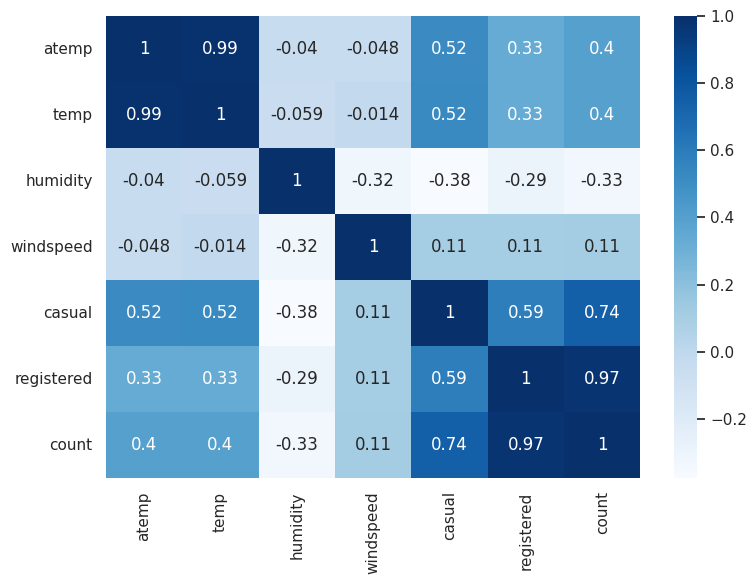

In [ ]:
# corrrelation chart

correlation_matrix = df[["atemp", "temp", "humidity", "windspeed", "casual", "registered", "count"]].corr()
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap="Blues")
plt.tight_layout()
plt.show()

**Insights*

---

The correlation matrix shows the Pearson correlation coefficients between pairs of variables. These coefficients range from -1 to 1, where:

1 indicates a perfect positive correlation.

-1 indicates a perfect negative correlation.

0 indicates no correlation.

*Detailed Interpretation*

**Temperature (Atemp and Temp):**

Strong positive correlation with bike rentals.

Higher temperatures increase both casual and registered rentals.

**Humidity:**

Moderate negative correlation with bike rentals.

Higher humidity decreases both casual and registered rentals.

**Windspeed:**

Very weak positive correlation with bike rentals.

Slight increase in bike rentals with higher windspeed.

**Casual Rentals:**

Strong positive correlation with total bike rentals.

Significantly impacted by temperature (positive) and humidity (negative).

**Registered Rentals:**

Very strong positive correlation with total bike rentals.

Also influenced by temperature (positive) and humidity (negative).

**Total Bike Rentals (Count):**

Driven significantly by both casual and registered rentals.

Positively correlated with temperature and negatively with humidity.





# **3. Check if there any signiﬁcant difference between the no. of bike rides on Weekdays and Weekends?**

a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

b. Select an appropriate test

c. Set a signiﬁcance level

d. Calculate test Statistics / p-value

e. Decide whether to accept or reject the Null Hypothesis.

f. Draw inferences & conclusions from the analysis and provide recommendations.

**Let,**

**H0: Working day has No effect on number of electric cycles rented**


**H1: Working day has effect on number of electric cycles rented**

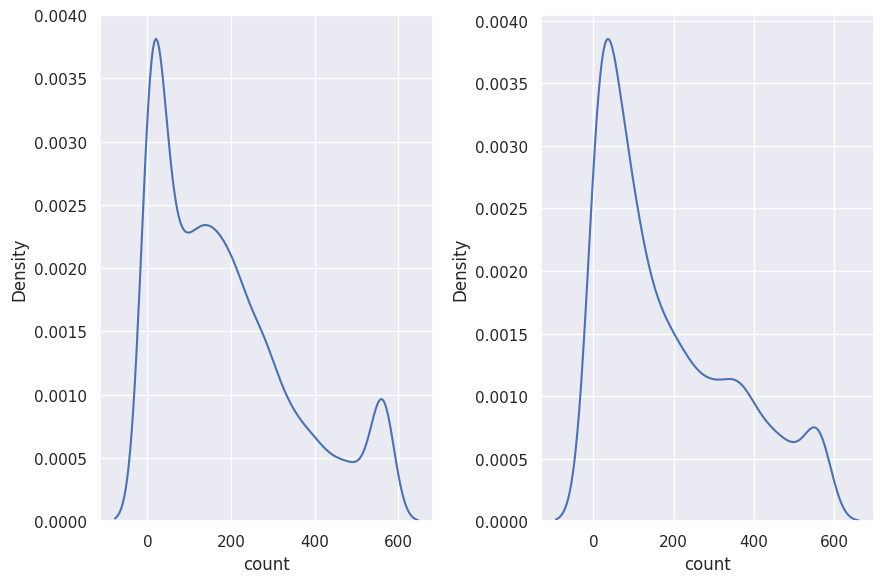

In [ ]:
working_day = df.loc[df['workingday']=="Yes", 'count']
non_working_day = df.loc[df['workingday']=="No", 'count']

fig, ax = plt.subplots(1,2,figsize=(9,6))
working_day_plot = sns.kdeplot(working_day,ax=ax[0])
non_working_day_plot = sns.kdeplot(non_working_day,ax=ax[1])
plt.tight_layout()
plt.show()

It's a two-sided test with one categorical and one numirical column where the distribution is not normal. We can use a non parametric method Wilcoxon-Mann-Whitney test here.

In [ ]:
!pip install pingouin
import pingouin

In [ ]:

pingouin.mwu(working_day,non_working_day).round(3)

,U-val,alternative,p-val,RBC,CLES
MWU,12857582.0,two-sided,0.911,0.001,0.499


Here p-value is 0.911 which is greater than alpha =0.05.

#**So we fail to reject the hypothesis. That means, working day or non-working day has no effects on number of users**

#**4. Check if the demand of bicycles on rent is the same for different Weather conditions?**

a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

b. Select an appropriate test -

c. Check assumptions of the test

i. Normality

ii. Equality Variance

iii. Please continue doing the analysis even if some assumptions f(Levene’s test or Shapiro-wilk test) but double check using visanalysis and report wherever necessary.

d. Set a signiﬁcance level and Calculate the test Statistics / p-value.

e. Decide whether to accept or reject the Null Hypothesis.

f. Draw inferences & conclusions from the analysis and provide recommendations.


***Let,**

 **H0: Weathers has No effect on number of electric cycles rented**

 **H1: Weathers has effect on number of electric cycles rented**

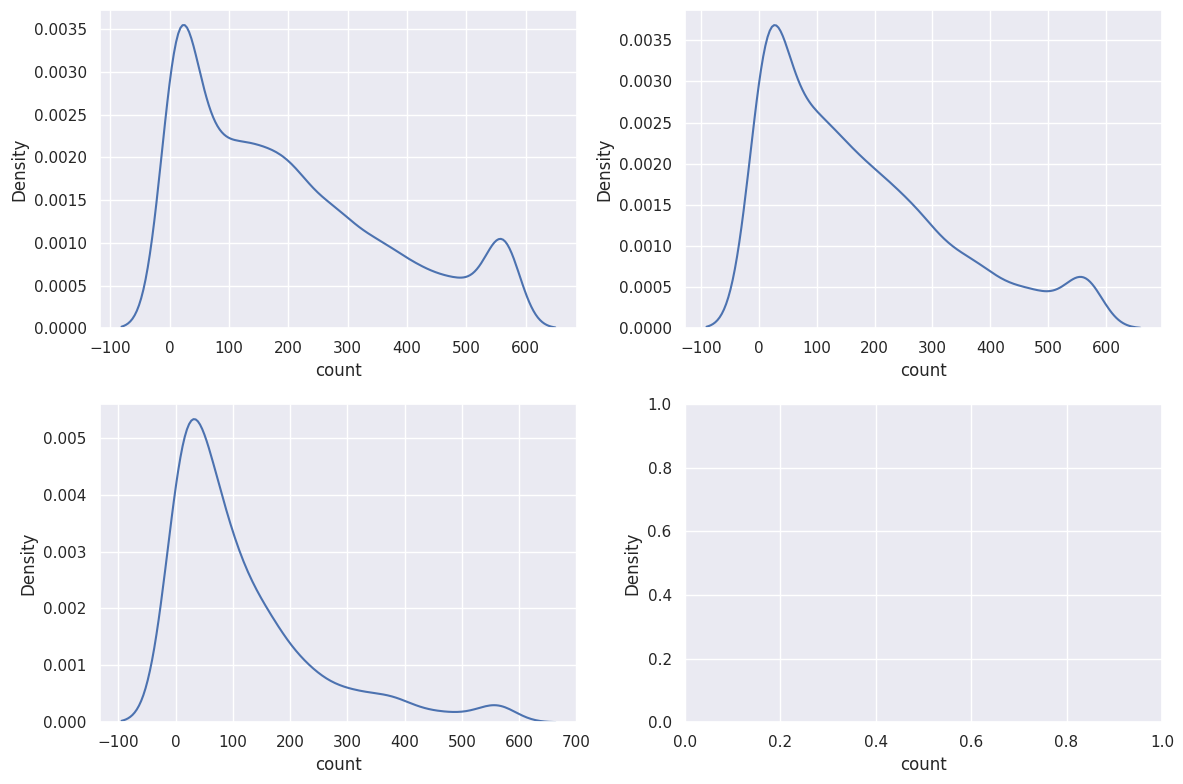

In [ ]:
# 1: Clear, Few clouds, partly cloudy, partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered  clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
clear = df.loc[df['weather']==1,'count']
mist = df.loc[df['weather']==2,'count']
light_rain = df.loc[df['weather']==3,'count']
heavy_rain = df.loc[df['weather']==4,'count']
fig, ax = plt.subplots(2,2,figsize=(12,8))
sns.kdeplot(clear,ax=ax[0,0])
sns.kdeplot(mist,ax=ax[0,1])
sns.kdeplot(light_rain,ax=ax[1,0])
sns.kdeplot(heavy_rain,ax=ax[1,1])
plt.tight_layout()
plt.show()

*It's a four-sided test with one categorical and one numerical column where the distribution is not normal. We can use a non parametric method kruskals test here.


In [ ]:
pingouin.kruskal(data=df[['weather','count']],dv='count',between='weather')

,Source,ddof1,H,p-unc
Kruskal,weather,3,204.785397,3.900417e-44


Here, P-value is 3.900417e-44 which is way too smaller than alpha=0.05.

#**We can reject the null hypothesis and say that,Weather effects the number of riders.**

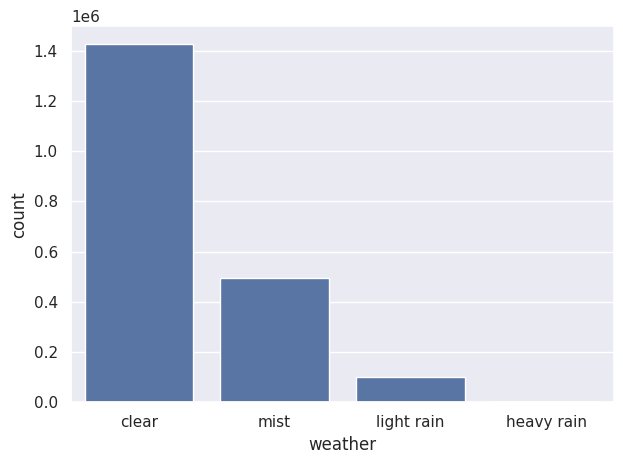

In [ ]:
weather_grouped = pd.DataFrame(df.groupby('weather')['count'].sum())
sns.barplot(data=weather_grouped,x=weather_grouped.index,y='count')
plt.xticks(range(4),['clear','mist','light rain','heavy rain'])
plt.tight_layout()
plt.show()

*We have no count for heavy rain section hence all the plots have been empty.

# **5. Check if the demand of bicycles on rent is the same for different Seasons?**

a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

b. Select an appropriate test -

c. Check assumptions of the test

i. Normality

ii. Equality Variance

iii. Please continue doing the analysis even if some assumptions f(Levene’s test or Shapiro-wilk test) but double check using visanalysis and report wherever necessary.

d. Set a signiﬁcance level and Calculate the test Statistics / p-value.

e. Decide whether to accept or reject the Null Hypothesis.

f. Draw inferences & conclusions from the analysis and provide recommendations.

***Let,**

 **H0: Seasons has No effect on number of electric cycles rented**

 **H1: Seasons has effect on number of electric cycles rented**

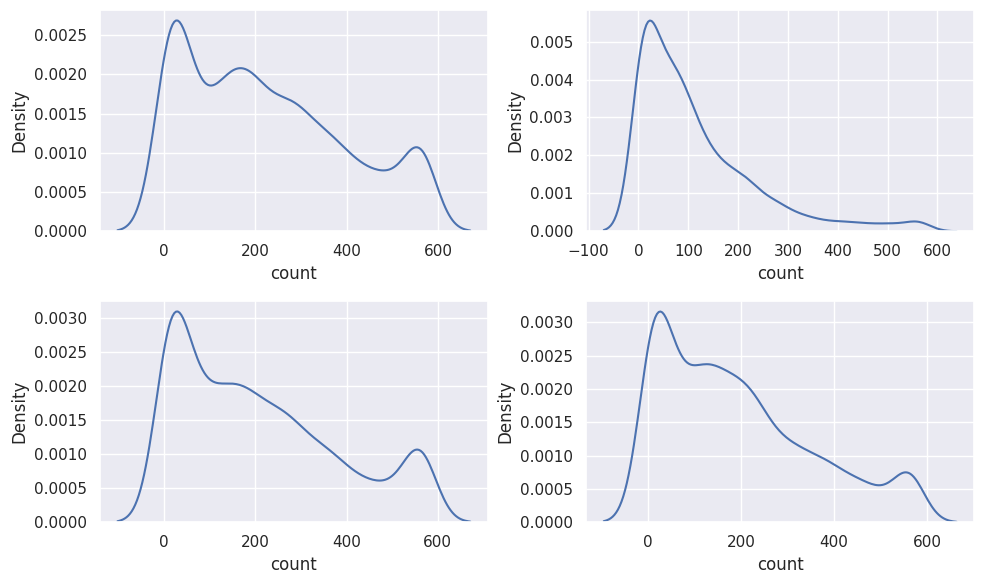

In [ ]:
# 1: spring, 2: summer, 3: fall, 4: winter
spring = df.loc[df['season']=="Fall",'count']
summer = df.loc[df['season']=="Spring",'count']
fall = df.loc[df['season']=="Summer",'count']
winter = df.loc[df['season']=="Winter",'count']
fig, ax = plt.subplots(2,2,figsize=(10,6))
sns.kdeplot(spring,ax=ax[0,0])
sns.kdeplot(summer,ax=ax[0,1])
sns.kdeplot(fall,ax=ax[1,0])
sns.kdeplot(winter,ax=ax[1,1])
plt.tight_layout()
plt.show()

It's a four-sided test with one categorical and one numirical column where the distribution is not normal. We can use a non parametric method kruskals test here.

In [ ]:
pingouin.kruskal(data=df,dv='count',between='season')

,Source,ddof1,H,p-unc
Kruskal,season,3,690.451523,2.468829e-149


Here, P-value is 2.468829e-149 which is way too smaller than alpha=0.05.

# **We can reject the null hypothesis and say that, Season effects the number of riders.**

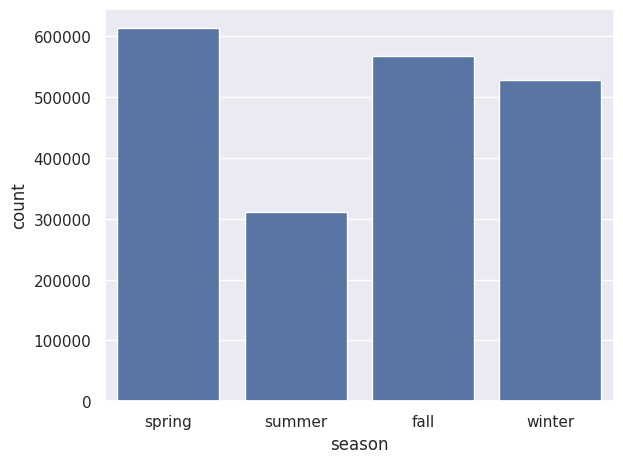

In [ ]:
season_grouped = pd.DataFrame(df.groupby('season')['count'].sum())
sns.barplot(data=season_grouped,x=season_grouped.index,y='count')
plt.xticks(range(4),['spring','summer','fall','winter'])
plt.tight_layout()
plt.show()

# **6. Check if the Weather conditions are signiﬁcantly different during different Seasons?**

a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)

b. Select an appropriate test -

c. Check assumptions of the test

i. Normality

ii. Equality Variance

iii. Please continue doing the analysis even if some assumptions f(Levene’s test or Shapiro-wilk test) but double check using visanalysis and report wherever necessary.

d. Set a signiﬁcance level and Calculate the test Statistics / p-value.

e. Decide whether to accept or reject the Null Hypothesis.

f. Draw inferences & conclusions from the analysis and provide recommendations.

 **Let,**

  **H0: Weather and Season are two independent columns**

 **H1: Weather and Season are two indifferent columns**

Here both the columns are categorical. So we can do a chi-square independence test.

In [ ]:
expected, observed, stats=pingouin.chi2_independence(df[['season', 'weather','count']], 'season', 'weather')
stats.loc[stats['test']=='pearson']

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,49.158656,9.0,1.549925e-07,0.038798,0.821837


Here the P-value is 1.549925e-07 which is much smaller than alpha =0.05.

# **So we can reject the null hypothesis and estabish that the weather and season column depends on each other.**

 **Insights**
---
1)Working day or non-working day has no effects on number of users.

2)Weather effects the number of riders.

3)Season effects the number of riders.

4)Weather and season column depends on each other

# **Recommendations**

**1) Optimize Bike Distribution in Peak Months:**
Concentrate bike deployment efforts during peak months, especially in June, July, and August, to meet increased demand and capitalize on favorable weather conditions.

**2)Seasonal Marketing Strategies:**
Tailor marketing efforts to leverage the seasonal trend, promoting Yulu's services more aggressively during summer months to attract a larger user base.

**3)Enhance User Engagement in Off-Peak Months:**
Implement targeted promotional campaigns or discounts during off-peak months (e.g., January to March) to encourage increased bike rentals and maintain consistent revenue flow.

**4)Weather-Responsive Pricing:**
Consider implementing dynamic pricing strategies that respond to weather conditions. For example, adjusting rental rates during extreme weather days to optimize revenue.

**5)Diversify Revenue Streams:**
Explore additional revenue streams, such as partnerships, sponsorships, or offering premium membership services with added benefits, to diversify income sources and boost overall profitability.

**6)Enhance User Experience:**
Invest in technology and infrastructure to improve the overall user experience, including app features, bike maintenance, and customer support, fostering loyalty and repeat business.

**7)Optimize Bike Deployment on Working Days:**
Given the lack of significant differences in bike rentals between working and non-working days, consider adjusting bike deployment strategies to ensure optimal resource allocation throughout the week.

**8)Adapt to Different Weather Conditions:**
Change promotions or discounts based on the weather. If it's rainy, for example, offer special deals to encourage more people to use the bikes.

**9)Promote Bikes Differently in Each Season:**
Advertise the bikes differently in each season. For example, highlight summer promotions in June, July, and August when more people want to ride bikes.

**10)Combine Season and Weather Plans:**
Plan bike availability based on both the season and the weather to make sure people have the bikes they need when they want them. For example, have more bikes available on sunny days in the summer.